In [2]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector as SFS



In [25]:
data = pd.read_csv('movieData.csv')
headers = data.head()

headers = np.array(data.columns)
for i in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) :
    print(headers[i])

#Prepare Average Vote
dataArray = data.values
array = np.zeros((dataArray.shape[0], dataArray.shape[1]-2))
print(np.shape(array))
X = dataArray[:,(2, 3, 4, 5, 6, 7, 8, 9, 12)]
X = X.astype('double')
Y = dataArray[:,11]
Y = Y.astype('double')

"""
# Reverse Feature Selection with Logistic Regression
model = LogisticRegression()
rfe = RFE(model, 1, verbose = 1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
"""

# Recursive Feature Elimination with Ridge Regression
model = Ridge(normalize=True)
rfe = RFE(model, n_features_to_select = 2, verbose = 1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
headers = np.reshape(headers,newshape=(np.shape(headers)[0],1))
print(np.shape(headers))
print("Feature Ranking: %s" % headers[np.array([2, 3, 4, 5, 6, 7, 8, 9, 12])])
print(fit.ranking_)


sfs_forward = SFS(model.fit(X,Y), n_features_to_select=4, direction="forward").fit(X, Y)
scores = sfs_forward
#print(scores)
feature_names = np.array(data.columns)
feature_names = feature_names[np.array([2, 3, 4, 5, 6, 7, 8, 9, 12])]
#print(feature_names)
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)







original_title
year
genre
duration
country
language
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
(6083, 13)
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Num Features: 2
(15, 1)
Feature Ranking: [['year']
 ['genre']
 ['duration']
 ['country']
 ['language']
 ['avg_vote']
 ['votes']
 ['budget']
 ['metascore']]
[3 1 4 6 2 1 7 8 5]
Features selected by forward sequential selection: ['country' 'language' 'votes' 'budget']


In [26]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,4)


original_title
year
genre
duration
country
language
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
Index(['title', 'original_title', 'year', 'genre', 'duration', 'country',
       'language', 'avg_vote', 'votes', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'reviews_from_users',
       'reviews_from_critics'],
      dtype='object')


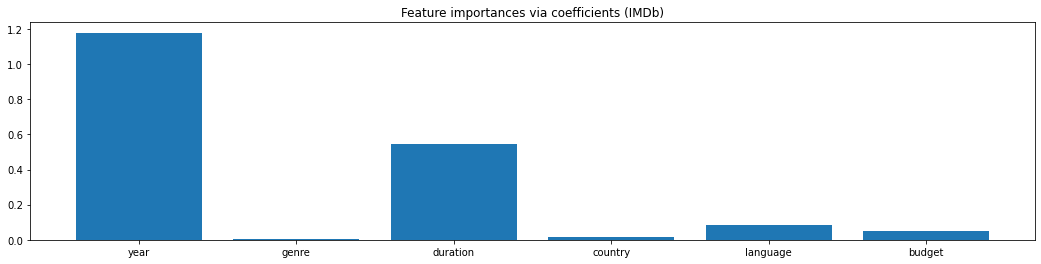

Features selected by SelectFromModel: ['year' 'duration']
Features selected by forward sequential selection: ['duration' 'language' 'budget']
Features selected by backward sequential selection: ['duration' 'language' 'budget']


In [119]:
## Feature Selection with LASSO Regression (IMDb Score)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel as SFM
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('movieData.csv')
headers = data.head()

headers = list(data.columns)
for i in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) :
    print(headers[i])


#Initialize Data
data = pd.read_csv('movieData.csv')
print(data.columns)
dataArray = data.values
#print(np.shape(array))
ind = (2, 3, 4, 5, 6, 9)
X = dataArray[:,ind]
X = X.astype('double') / X.max(axis=0)
Y1 = dataArray[:,7]
Y1 = Y1.astype('double') / Y1.max(axis=0)

#LassoCV Fit
lasso = LassoCV().fit(X, Y1)
importance = np.abs(lasso.coef_)
feature_names = np.array(headers)[np.array(np.array(ind))]

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients (IMDb)")
plt.show()

thresh = np.sort(importance)[-3] + 0.01

sfm = SFM(lasso, threshold=thresh).fit(X, Y1)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")


sfs_forward = SFS(lasso, n_features_to_select=3, direction="forward").fit(X, Y1)

sfs_backward = SFS(lasso, n_features_to_select=3, direction="backward").fit(X, Y1)

print("Features selected by forward sequential selection: " f"{feature_names[sfs_forward.get_support()]}")

print("Features selected by backward sequential selection: " f"{feature_names[sfs_backward.get_support()]}")





original_title
year
genre
duration
country
language
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
Index(['title', 'original_title', 'year', 'genre', 'duration', 'country',
       'language', 'avg_vote', 'votes', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'reviews_from_users',
       'reviews_from_critics'],
      dtype='object')


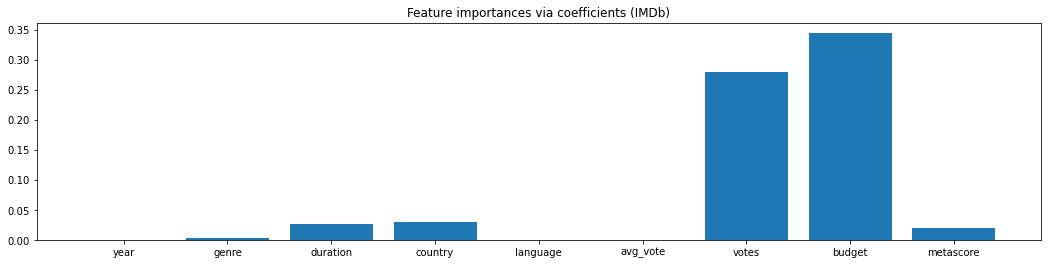

Features selected by SelectFromModel: ['votes' 'budget']
Features selected by forward sequential selection: ['votes' 'budget' 'metascore']
Features selected by backward sequential selection: ['votes' 'budget' 'metascore']


In [120]:
## Feature Selection with LASSO Regression (Worldwide Gross)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel as SFM
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('movieData.csv')
headers = data.head()

headers = list(data.columns)
for i in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) :
    print(headers[i])


#Initialize Data
data = pd.read_csv('movieData.csv')
print(data.columns)
dataArray = data.values
#print(np.shape(array))
ind = (2, 3, 4, 5, 6, 7, 8, 9, 12)
X = dataArray[:,ind]
X = X.astype('double') / X.max(axis=0)
Y1 = dataArray[:,11]
Y1 = Y1.astype('double') / Y1.max(axis=0)

#LassoCV Fit
lasso = LassoCV().fit(X, Y1)
importance = np.abs(lasso.coef_)
feature_names = np.array(headers)[np.array(np.array(ind))]

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients (Worldwide Gross)")
plt.show()

thresh = np.sort(importance)[-3] + 0.01

sfm = SFM(lasso, threshold=thresh).fit(X, Y1)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")


sfs_forward = SFS(lasso, n_features_to_select=3, direction="forward").fit(X, Y1)

sfs_backward = SFS(lasso, n_features_to_select=3, direction="backward").fit(X, Y1)

print("Features selected by forward sequential selection: " f"{feature_names[sfs_forward.get_support()]}")

print("Features selected by backward sequential selection: " f"{feature_names[sfs_backward.get_support()]}")

In [ ]:
### SVM Attempt

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#Initialize Data
data = pd.read_csv('movieData.csv')
#print(data.columns)
dataArray = data.values
#print(np.shape(array))
i = int(np.shape(dataArray)[0]*.8)
XR = dataArray[0:i,(9,10)]
X = XR.astype("float") / XR.max(axis=0)
yR = dataArray[0:i,11]
y = np.float64(yR) / yR.max(axis=0)

SC = StandardScaler()
X = SC.fit_transform(XR)
yR = yR.reshape(-1, 1)
y = SC.fit_transform(yR)

# Fit regression model
svr_rbf = SVR(kernel="rbf", C=.1, gamma=1e-6, epsilon=0.1)
svr_rbf.fit(X,y)

#Plot Results
X_test = dataArray[i:np.shape(dataArray)[0],(9,10)]
Y_test = dataArray[i:np.shape(dataArray)[0],11]

y_pred = svr_rbf.predict(X_test)
print(y_pred)
print(yR.max(axis=0))
y_pred = y_pred * yR.max(axis=0)

#Visualize
print(np.shape(X_test))
print(np.shape(y_pred))
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:,0], X_test[:,1],y_pred)
plt.show()
print(np.ptp(y_pred))